# Instacart Grocery Basket Analysis. Part 1.

Table of Contents
Section 1: Data Transformations
Importing the last Data set
Considering Security Implications
Regional Segmentation (by state) of Data
Differences in Regional Spending
Flagging Customers by Activity

Section 2: Creating Customer Profiles and Visualizations
Finding top departments with frequent orders
Price Range Groupings
How Prices Differ Among Products
Age Profile
Customers Status Profile
Customer distribution by loyalty status
Ordering Habits Based on Loyalty Status
Checking when different categories make orders during the week
Age categories and order hour of day
Age categories and departments
Which products are popular in specific regions?
Exporting data

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
path = r'C:\Users\ZenBook\Instacart Basket Analysis_30.09.25'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_merge_custs.pkl'))

In [4]:
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,regul_used_median,regul_user_median,order_frequency_flag,gender,state,age,date_joined,n_dependants,status,income
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,8.0,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,8.0,8.0,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,8.0,8.0,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,9.0,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,9.0,9.0,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308


# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [5]:
# check column names
df.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spend_by_user_avg', 'spending_flag', 'regul_used_median',
       'regul_user_median', 'order_frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'status', 'income'],
      dtype='object')

Information about the'first_name' and'last_name' of customers were droped in the previous Exercise.
In this case as identificator of customers I left 'user_id' instead.

# Regional Segmentation (by state) of Data

In [6]:
# changing state full name to abbreviation
state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
    'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN',
    'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR',
    'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

In [7]:
# put abbreviation accordint to the region
region_map = {
    # West
    'AZ': 'West', 'CO': 'West', 'ID': 'West', 'MT': 'West', 'NV': 'West', 'NM': 'West', 'UT': 'West', 'WY': 'West',
    'AK': 'West', 'CA': 'West', 'HI': 'West', 'OR': 'West', 'WA': 'West',
    # Midwest
    'IL': 'Midwest', 'IN': 'Midwest', 'MI': 'Midwest', 'OH': 'Midwest', 'WI': 'Midwest',
    'IA': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'MO': 'Midwest', 'NE': 'Midwest', 'ND': 'Midwest', 'SD': 'Midwest',
    # Northeast
    'CT': 'Northeast', 'ME': 'Northeast', 'MA': 'Northeast', 'NH': 'Northeast', 'RI': 'Northeast', 'VT': 'Northeast',
    'NJ': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast',
    # South
    'DE': 'South', 'FL': 'South', 'GA': 'South', 'MD': 'South', 'NC': 'South', 'SC': 'South', 'VA': 'South',
    'DC': 'South', 'WV': 'South', 'AL': 'South', 'KY': 'South', 'MS': 'South', 'TN': 'South',
    'AR': 'South', 'LA': 'South', 'OK': 'South', 'TX': 'South'}

In [8]:
# applying changes

df['state_abbrev'] = df['state'].map(state_abbrev)
df['region'] = df['state_abbrev'].map(region_map)

In [9]:
# check
df[['state', 'state_abbrev', 'region']].drop_duplicates().sort_values('state').head(10)

,state,state_abbrev,region
11,Alabama,AL,South
10,Alaska,AK,West
214,Arizona,AZ,West
75,Arkansas,AR,South
86,California,CA,West
324,Colorado,CO,West
268,Connecticut,CT,Northeast
56,Delaware,DE,South
6,District of Columbia,DC,South
17,Florida,FL,South


Source for region mapping https://simple.wikipedia.org/wiki/List_of_regions_of_the_United_States

In [10]:
# checking columns in df
df.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,order_frequency_flag,gender,state,age,date_joined,n_dependants,status,income,state_abbrev,region
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,MN,Midwest
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Frequent customer,Male,Minnesota,81,8/1/2019,1,married,49620,MN,Midwest
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Frequent customer,Female,Vermont,66,6/16/2018,2,married,158302,VT,Northeast
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,WI,Midwest
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Frequent customer,Female,Wisconsin,40,2/9/2020,3,married,31308,WI,Midwest


In [11]:
# checking shape
df.shape

(32406041, 35)

# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set. Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions). Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag).

# Differences in Regional Spending

In [12]:
# creating a crosstab of the 'region' with 'spending_flag' column 

crosstab_region_spend = pd.crosstab(df['region'], df['spending_flag'], dropna = False)

In [13]:
# check crosstab
crosstab_region_spend

spending_flag,High spender,Low spender
region,,
Midwest,155979,7441606
Northeast,108226,5614713
South,209693,10582607
West,160354,8132863


In [14]:
# counting the'spending_flag'.
df['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     31771789
High spender      634252
Name: count, dtype: int64

As we can see, the bigger amount of customers are LOW SPENDERS.

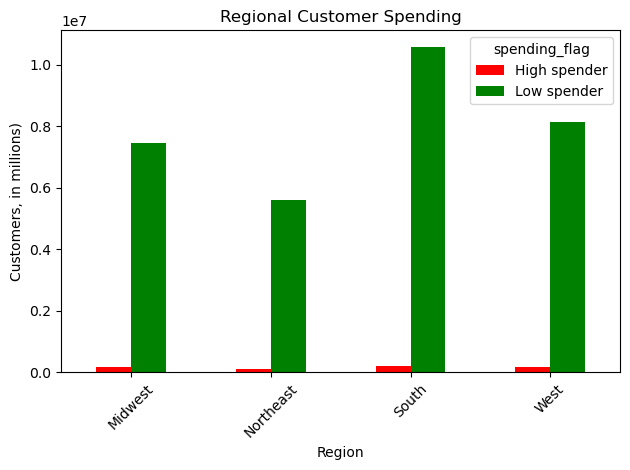

In [15]:
# creating a bar chart for visualization 
bar_region_spend = crosstab_region_spend.plot(kind="bar", color = ['red', 'green'] )

# Title 
plt.title ('Regional Customer Spending')

# Rotating labels for better readability 
plt.xlabel ('Region')
plt.xticks(rotation=45)

# Y-axis label is in scientific notation (1e7 is actually 10 million) so it is showing raw counts. 
plt.ylabel ('Customers, in millions)')

# Layout
plt.tight_layout()

The bar chart indicates that across all regions, the majority of customers are classified as low spenders, while high spenders appear infrequently. This consistent pattern suggests that spending habits do not vary significantly between regions.

In [16]:
# exporting of the bar chart

bar_region_spend.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_region_spend.png', bbox_inches='tight')

# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

# Flagging Customers by Activity

In [17]:
# creating a new exclusion_flag column based on the 'max_order' column 

df.loc[df['max_order'] < 5, 'customer_activity'] = 'low'
df.loc[df['max_order'] >= 5, 'customer_activity'] = 'high'

In [18]:
# сhecking flag count
df['customer_activity'].value_counts(dropna = False)

customer_activity
high    30965686
low      1440355
Name: count, dtype: int64

In [19]:
# сreating a new dataframe with low-activity customers only
df_low_act_custs = df[df['customer_activity']=='low']

In [20]:
# check 
df_low_act_custs.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,gender,state,age,date_joined,n_dependants,status,income,state_abbrev,region,customer_activity
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,...,Female,Wisconsin,40,2/9/2020,3,married,31308,WI,Midwest,low
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,...,Female,Wisconsin,40,2/9/2020,3,married,31308,WI,Midwest,low
34,1,Chocolate Sandwich Cookies,61,19,5.8,2434812,1598,prior,1,2,...,Male,Kansas,41,1/7/2018,2,married,122060,KS,Midwest,low
35,1,Chocolate Sandwich Cookies,61,19,5.8,1531889,1598,prior,2,2,...,Male,Kansas,41,1/7/2018,2,married,122060,KS,Midwest,low
36,1,Chocolate Sandwich Cookies,61,19,5.8,726947,1598,prior,3,4,...,Male,Kansas,41,1/7/2018,2,married,122060,KS,Midwest,low


In [21]:
# checking shape of df 'df_low_act_custs' low-activity customers
df_low_act_custs.shape

(1440355, 36)

In [22]:
# Exporting subset of low-activity customers
df_low_act_custs.to_pickle(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\low_activity_customers.pkl')

Next excluding the low-activity customers from the data

In [23]:
# checking df
df.shape

(32406041, 36)

In [24]:
# making a new dataframe with a high-activity customers only
df_2 = df[df['customer_activity']== 'high']

In [25]:
# checking
df_2.shape

(30965686, 36)

In [26]:
# checking columns
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,gender,state,age,date_joined,n_dependants,status,income,state_abbrev,region,customer_activity
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,MN,Midwest,high
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,Male,Minnesota,81,8/1/2019,1,married,49620,MN,Midwest,high
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,Female,Vermont,66,6/16/2018,2,married,158302,VT,Northeast,high
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,Female,Hawaii,51,1/4/2019,2,married,57797,HI,West,high
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,Male,District of Columbia,20,5/8/2019,3,living with parents and siblings,34171,DC,South,high


# Are there certain types of products that are more popular than others?

# Finding which departments more frequent orders 

In [65]:
df_2['department'].value_counts()

department
produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           671872
personal care       424359
babies              410392
international       255991
alcohol             144674
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

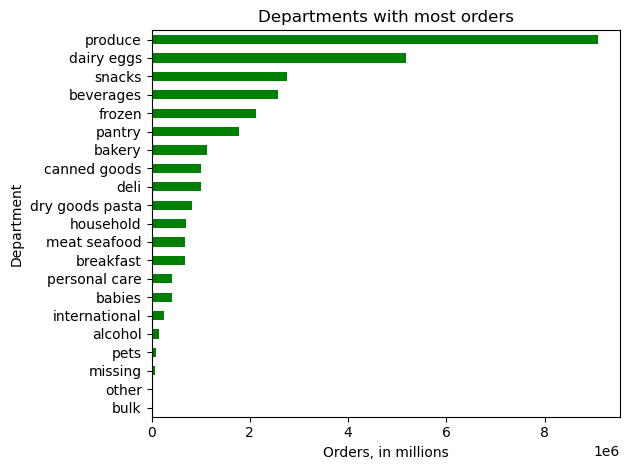

In [66]:
# Bar chart of departments by order count. 

bar_popular_dept = df_2['department'].value_counts().sort_values().plot(kind = 'barh', color = ['green'])

plt.title('Departments with most orders')
plt.xlabel('Orders, in millions')
plt.ylabel('Department')

plt.tight_layout()

Produce, dairy/eggs, snack, beverages, and frozen are the top 5 departments with the most orders.
This suggests that the marketing team should focus promoting departments with fewer orders (pet, alcohol, international,etc.) to increase sales.

In [67]:
# exporting graph 

bar_popular_dept.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_popular_dept.png',bbox_inches='tight')

In [68]:
# Finding products that most popular in 'produce' 

df_produce_only = df_2[df_2['department'] == 'produce']

# Checking df with only produce items.

df_produce_only.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,age,date_joined,n_dependants,status,income,state_abbrev,region,customer_activity,age_category,department
10881,31,White Pearl Onions,123,4,7.5,2766690,2937,prior,3,1,...,28,5/25/2018,3,married,88405,OH,Midwest,high,Young Parent,produce
10882,31,White Pearl Onions,123,4,7.5,2960023,4582,prior,2,2,...,24,8/1/2019,1,married,64749,TN,South,high,Young Parent,produce
10883,31,White Pearl Onions,123,4,7.5,987065,4582,prior,13,6,...,24,8/1/2019,1,married,64749,TN,South,high,Young Parent,produce
10884,31,White Pearl Onions,123,4,7.5,1062850,4705,prior,65,4,...,65,6/26/2017,0,divorced/widowed,63568,ID,West,high,Senior,produce
10885,31,White Pearl Onions,123,4,7.5,741886,8662,prior,14,3,...,62,3/7/2017,2,married,87777,TN,South,high,Middle-aged Parent,produce


In [69]:
# top 10 most sold products from 'produce' department 

top_produce_items = df_produce_only['product_name'].value_counts().head(10)

In [70]:
# List of top 10 'produce' products
top_produce_items

product_name
Banana                    453164
Bag of Organic Bananas    366403
Organic Strawberries      255988
Organic Baby Spinach      231772
Organic Hass Avocado      206799
Organic Avocado           168267
Large Lemon               145397
Strawberries              136330
Limes                     134751
Organic Raspberries       132945
Name: count, dtype: int64

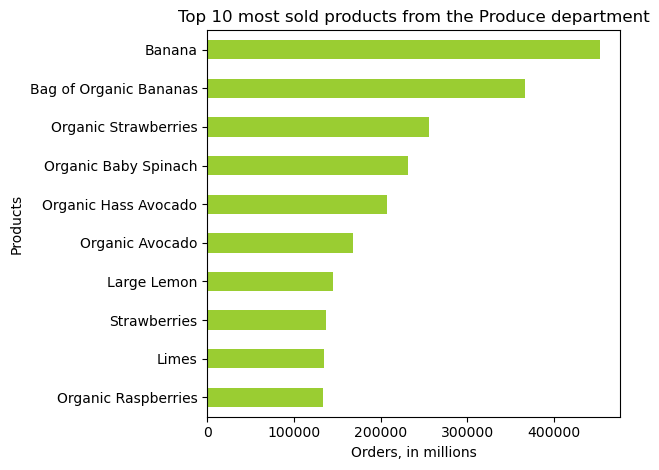

In [71]:
#  visualization graph

bar_top10_produce = top_produce_items.sort_values().plot(kind='barh', color='yellowgreen')

plt.title('Top 10 most sold products from the Produce department')
plt.xlabel('Orders, in millions')
plt.ylabel('Products')
plt.tight_layout()

In [72]:
# exporting top10 products sold in 'produce'

bar_top10_produce.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_top10_produce.png', bbox_inches='tight')

# Price range groupings

In [73]:
# finding distribution of price range groupings 
df_2['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     20892852
Low-range product      9674881
High-range product      397953
Name: count, dtype: int64

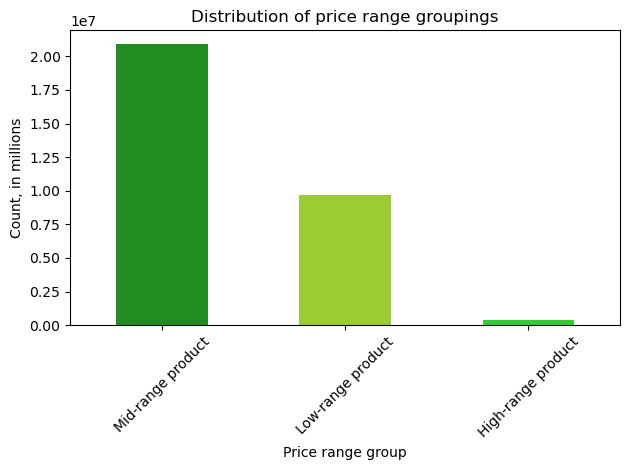

In [74]:
# bar chart of price range groupings 

bar_price_range = df_2['price_range_loc'].value_counts().plot.bar(color = ['forestgreen', 'yellowgreen', 'limegreen'])
                                                                                 
plt.title('Distribution of price range groupings')
plt.xlabel('Price range group')
plt.xticks(rotation=45)
plt.ylabel('Count, in millions')

plt.tight_layout()

In [75]:
# exporting bar chart

bar_price_range.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_price_range_dist.png',bbox_inches='tight')

# How Prices Differ Among Products

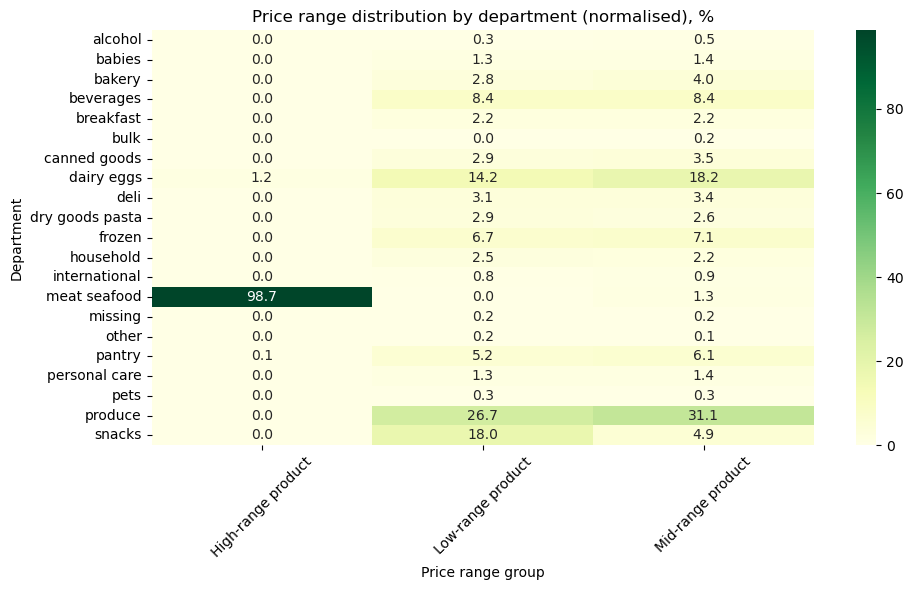

<Figure size 640x480 with 0 Axes>

In [79]:
# Heatmap of price ranges and department 

# crosstab
crosstab_price_group_dept = pd.crosstab(df_2['department'], df_2['price_range_loc'], normalize='columns')

# multiply by 100 to express as percentages
crosstab_price_group_dept_prop_percent = crosstab_price_group_dept * 100

# Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_price_group_dept_prop_percent, annot=True, fmt='.1f', cmap='YlGn')

plt.title('Price range distribution by department (normalised), %')
plt.xlabel('Price range group')
plt.ylabel('Department')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Saving figure
plt.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\heatmap_price_dept.png', bbox_inches='tight')

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent”). Create an appropriate visualization to show the distribution of profiles.

In [27]:
# exporting df_2 with data for high-activity customers only

df_2.to_pickle(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\active_custs.pkl')

# Age Profiling

In [28]:
# checking statistics of 'age'

df_2['age'].describe()

count    3.096569e+07
mean     4.946800e+01
std      1.848526e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

- Average age is around 49
- Min age is around 18
- Max age is 81
- Most customers (50% and 75%) are older (49-65 and over)
- Possible age groupings:  <= 33 (Young), >33 and <=65 (Middle-aged), >65 (Senior)

# Customers Status Profile

In [29]:
# Grouping ages into categories based on the quartiles. 
# Young Parent: age ≤ 33 and has dependants
df_2.loc[(df_2['age'] <= 33) & (df_2['n_dependants'] >= 1), 'age_category'] = 'Young Parent'

# Young Single: age ≤ 33 and no dependants
df_2.loc[(df_2['age'] <= 33) & (df_2['n_dependants'] == 0), 'age_category'] = 'Young Single'

# Middle-aged Parent: 34–64 and has dependants
df_2.loc[(df_2['age'] > 33) & (df_2['age'] < 65) & (df_2['n_dependants'] >= 1), 'age_category'] = 'Middle-aged Parent'

# Middle-aged Single: 34–64 and no dependants
df_2.loc[(df_2['age'] > 33) & (df_2['age'] < 65) & (df_2['n_dependants'] == 0), 'age_category'] = 'Middle-aged Single'

# Senior: age ≥ 65
df_2.loc[df_2['age'] >= 65, 'age_category'] = 'Senior'

C:\Users\ZenBook\AppData\Local\Temp\ipykernel_5952\2673137626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[(df_2['age'] <= 33) & (df_2['n_dependants'] >= 1), 'age_category'] = 'Young Parent'


In [30]:
# checking categories 

df_2['age_category'].value_counts(dropna = False)

age_category
Middle-aged Parent    11233933
Senior                 8195806
Young Parent           5817958
Middle-aged Single     3778198
Young Single           1939791
Name: count, dtype: int64

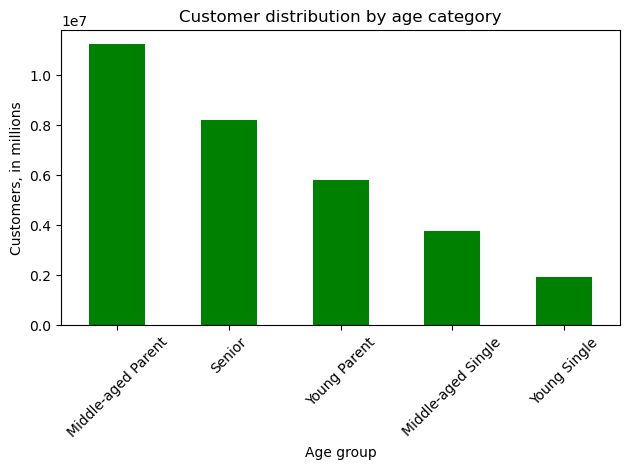

In [31]:
# visualizing age categories of customers via bar chart

bar_custs_age = df_2['age_category'].value_counts().plot(kind = 'bar', color = ['green'])

plt.title('Customer distribution by age category')
plt.xlabel('Age group')
plt.xticks(rotation=45)
plt.ylabel('Customers, in millions')
plt.tight_layout()

The majority of customers are Middle-aged (over 33), while Young adults represent the smallest segment - though their numbers are comparable to those of Seniors.

In [32]:
# exporting bar chart
bar_custs_age.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_custs_age.png', bbox_inches='tight')

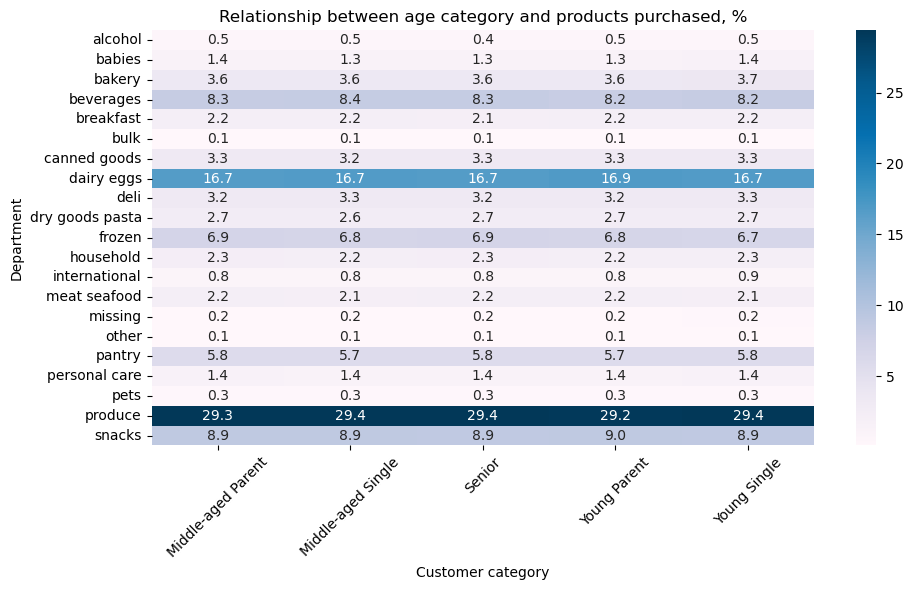

<Figure size 640x480 with 0 Axes>

In [86]:
# Crosstab of age_category and departments to see if certain items are popular among different customer segments


# Making crosstab
crosstab_fam_department = pd.crosstab(df_2['department'], df_2['age_category'], normalize='columns')

# multiply by 100 to express as percentages
crosstab_fam_department_prop_percent = crosstab_fam_department * 100


# Plotting heatmap
plt.figure(figsize=(10, 6))                            
sns.heatmap(crosstab_fam_department_prop_percent, cmap='PuBu', annot=True,fmt='.1f')
                                    
                                      
# Labels
plt.title('Relationship between age category and products purchased, %')
plt.ylabel('Department')
plt.xlabel('Customer category')
plt.xticks(rotation=45)
plt.yticks(rotation=0)                                      
plt.tight_layout()
plt.show()

# Saving figure
plt.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\heatmap_custcateg_dept.png', bbox_inches='tight')

# Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [36]:
agg_df = df_2.groupby('age_category')['prices'].agg([
    'min',
    'max',
    'mean',
    'median',
    'std',
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.75)
])

agg_df.columns = ['min', 'max', 'mean', 'median', 'std', 'Q1', 'Q3']

In [37]:
agg_df

,min,max,mean,median,std,Q1,Q3
age_category,,,,,,,
Middle-aged Parent,1.0,99999.0,11.954540,7.4,487.578478,4.2,11.3
Middle-aged Single,1.0,99999.0,12.043409,7.4,528.752163,4.2,11.2
Senior,1.0,99999.0,11.757620,7.4,472.260533,4.2,11.3
Young Parent,1.0,99999.0,11.941079,7.4,479.655739,4.2,11.3
Young Single,1.0,99999.0,12.315389,7.4,547.761416,4.2,11.2


Only age and presence of depenants don't play a role in expenditure, since all the categories spend almost the same amount.

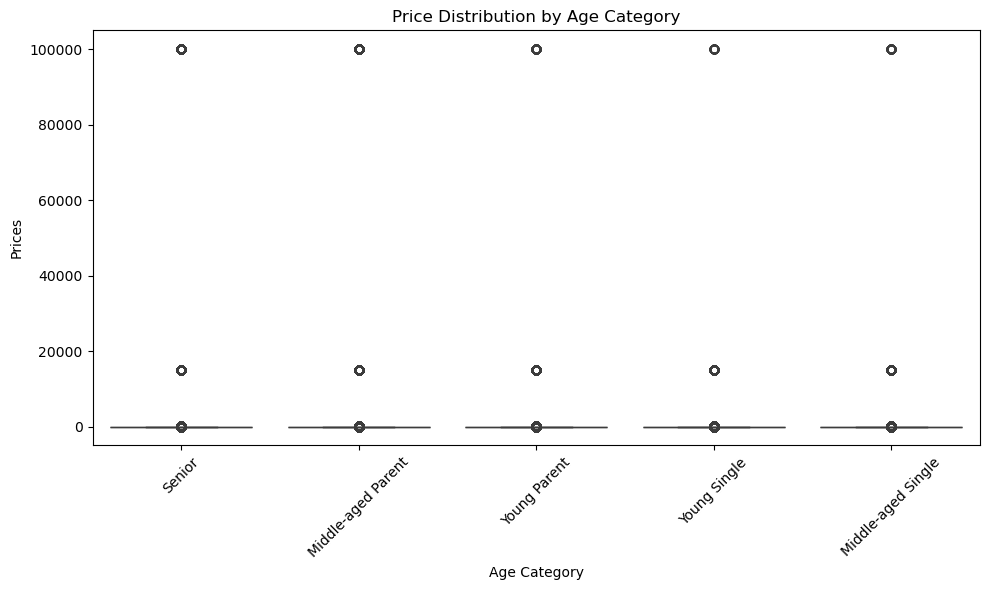

In [39]:
# create boxplot 

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_2, x='age_category', y='prices', hue='age_category', palette='OrRd', legend=False)

plt.title('Price Distribution by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Prices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
# save boxplot
plt.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\boxplot_price_by_age.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

# Customer distribution by loyalty status¶

In [40]:
df_2.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spend_by_user_avg', 'spending_flag', 'regul_used_median',
       'regul_user_median', 'order_frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'status', 'income', 'state_abbrev',
       'region', 'customer_activity', 'age_category'],
      dtype='object')

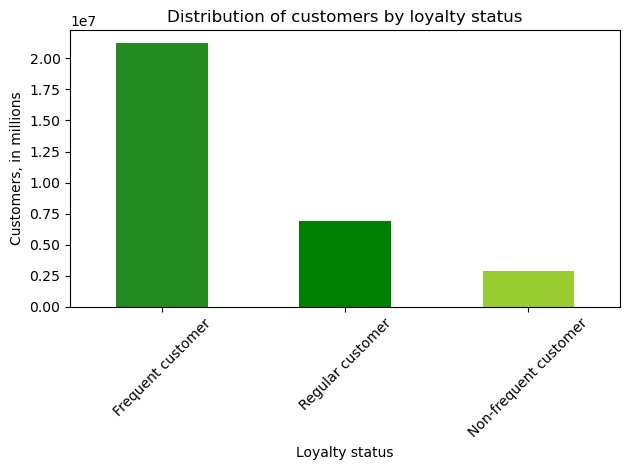

In [41]:
# сhecking customer distribution based on loyalty status. 

bar_loyalty_status = df_2['order_frequency_flag'].value_counts(dropna = False).plot.bar(color = ['forestgreen', 'green', 'yellowgreen'])

plt.title('Distribution of customers by loyalty status')
plt.xlabel('Loyalty status')
plt.ylabel('Customers, in millions')
plt.xticks(rotation=45)
plt.tight_layout()

In [42]:
# exporting chart

bar_loyalty_status.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_loyalty_dist.png', bbox_inches='tight')

# Ordering Habits Based on Loyalty Status

In [44]:
# checking ordering habits of customers based on loyalty status

df_2.groupby('order_frequency_flag').agg({'order_number' : ['mean', 'min', 'max', 'median', 'std']})

order_number                          
                              mean min max median        std
order_frequency_flag                                        
Frequent customer        22.471491   1  99   17.0  19.235270
Non-frequent customer     5.104136   1  25    5.0   3.305484
Regular customer          8.878935   1  45    7.0   6.343404

In [45]:
# creating variable

mean_order_loyalty = df_2.groupby('order_frequency_flag')['order_number'].mean()
mean_order_loyalty

order_frequency_flag
Frequent customer        22.471491
Non-frequent customer     5.104136
Regular customer          8.878935
Name: order_number, dtype: float64

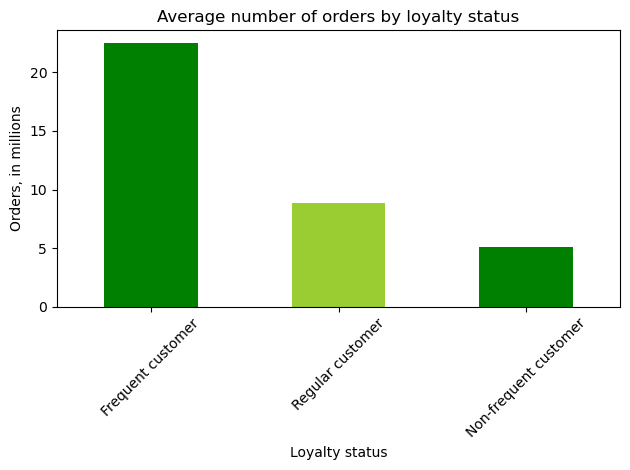

In [46]:
# sorting values from highest to lowest
mean_order_loyalty_sorted = mean_order_loyalty.sort_values(ascending=False)

# visualization bar chart - ordering habits by loyalty status
bar_avg_order_loyalty = mean_order_loyalty_sorted.plot.bar(color=['green', 'yellowgreen'])

# labels
plt.title('Average number of orders by loyalty status')
plt.xlabel('Loyalty status')
plt.ylabel('Orders, in millions')
plt.xticks(rotation=45)
plt.tight_layout()

In [47]:
# exporting bar chart

bar_avg_order_loyalty.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_loyalty_avg_order.png',bbox_inches='tight')

In [48]:
df_2.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'first_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'spend_by_user_avg', 'spending_flag', 'regul_used_median',
       'regul_user_median', 'order_frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'status', 'income', 'state_abbrev',
       'region', 'customer_activity', 'age_category'],
      dtype='object')

In [49]:
# finding days_since_prior_order by 'order_frequency_flag'

df_2.groupby('order_frequency_flag').agg({'days_since_prior_order': ['min', 'max', 'mean', 'median', 'std']})

days_since_prior_order                                  
                                         min   max       mean median       std
order_frequency_flag                                                          
Frequent customer                        0.0  30.0   7.858266    6.0  6.314398
Non-frequent customer                    0.0  30.0  22.790490   28.0  8.804334
Regular customer                         0.0  30.0  15.532006   14.0  8.542288

# Checking when different categories make orders during the week

In [50]:
crosstab_age_dow = pd.crosstab(df_2['order_dow'], df_2['age_category'], dropna = False)

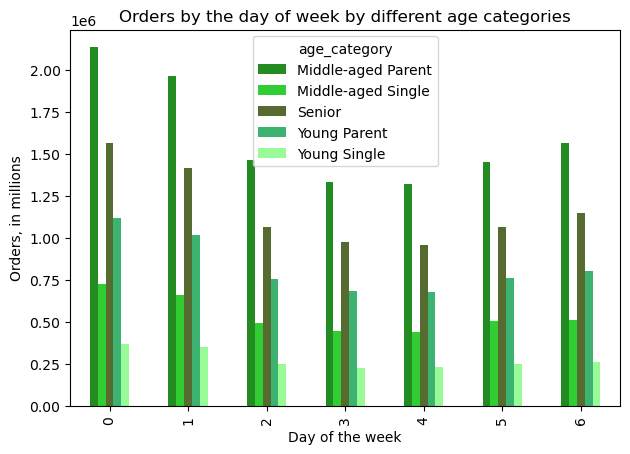

In [51]:
# creating bar chart based on crosstab 
bar_age_orders_dow = crosstab_age_dow.plot(kind = 'bar', color = ['forestgreen', 'limegreen', 'darkolivegreen', 'mediumseagreen', 'palegreen'])
                                                
# Title 
plt.title ('Orders by the day of week by different age categories')
plt.xlabel ('Day of the week')
plt.ylabel ('Orders, in millions')

# Layout
plt.tight_layout()

The chart shows that Middle-aged Parents are the most active shoppers throughout the week, especially on day 0 (Sunday), which sees peak order volume across all groups. All categories place the most orders on Saturday and Sunday (0 and 1).

In [52]:
# exporting bar chart 'age_orders_dow'

bar_age_orders_dow.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\age_order_dow.png',bbox_inches='tight')

# Age categories and order hour of day 

In [53]:
# crosstab 
crosstab_order_hour_age = pd.crosstab(df_2['order_hour_of_day'], df_2['age_category'])

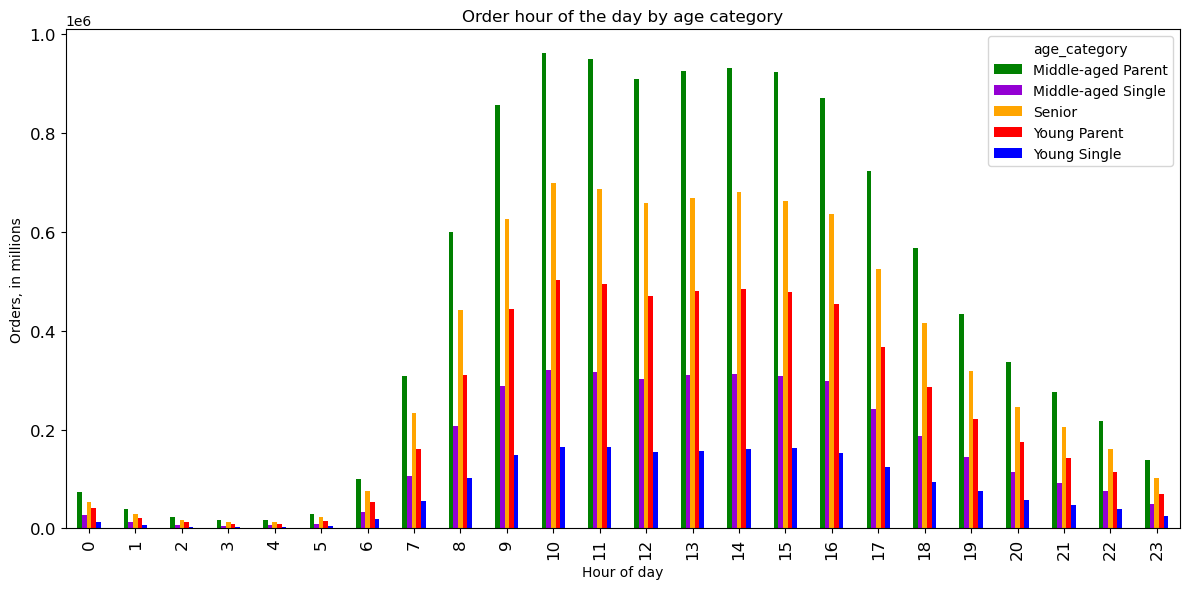

In [54]:
# bar chart 
bar_age_order_hour = crosstab_order_hour_age.plot(kind = 'bar', color = ['green', 'darkviolet', 'orange', 'red', 'blue'],  figsize=(12, 6), fontsize=12)

plt.title('Order hour of the day by age category')
plt.ylabel('Orders, in millions')
plt.xlabel('Hour of day')
                                
plt.tight_layout()

- A bar chart show peaks in ordering times.
- The chart shows that each age group follows the same trend, but in varying degrees.
- Middle-aged Parents place the most orders, followed by Seniors, with Young Single placing the least amount of orders during any hour.
- All age groups place the most orders at 10 am (peak).
- After 3pm observed less orders following till the end of the day.
- The lowest amount of orders are placed after midnight till 5am. 

In [55]:
# exporting 

bar_age_order_hour.figure.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\bar_age_order_hour.png',bbox_inches='tight')

# Age categories and departments

In [56]:
# add department name to the df as a separate column
# create the dictionary
dept_map = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'}

In [57]:
df_2.loc[:, 'department'] = df_2['department_id'].map(dept_map)

C:\Users\ZenBook\AppData\Local\Temp\ipykernel_5952\3023857579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.loc[:, 'department'] = df_2['department_id'].map(dept_map)


In [58]:
# check columns
df_2.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_dow,...,age,date_joined,n_dependants,status,income,state_abbrev,region,customer_activity,age_category,department
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,...,81,8/1/2019,1,married,49620,MN,Midwest,high,Senior,snacks
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,...,81,8/1/2019,1,married,49620,MN,Midwest,high,Senior,snacks
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,...,66,6/16/2018,2,married,158302,VT,Northeast,high,Senior,snacks
5,1,Chocolate Sandwich Cookies,61,19,5.8,1701441,777,prior,16,1,...,51,1/4/2019,2,married,57797,HI,West,high,Middle-aged Parent,snacks
6,1,Chocolate Sandwich Cookies,61,19,5.8,1871483,825,prior,3,2,...,20,5/8/2019,3,living with parents and siblings,34171,DC,South,high,Young Parent,snacks


In [59]:
# check the shape
df_2.shape

(30965686, 38)

In [60]:
# creating crosstab
crosstab_age_department = pd.crosstab(df_2['department'], df_2['age_category'], normalize='columns')

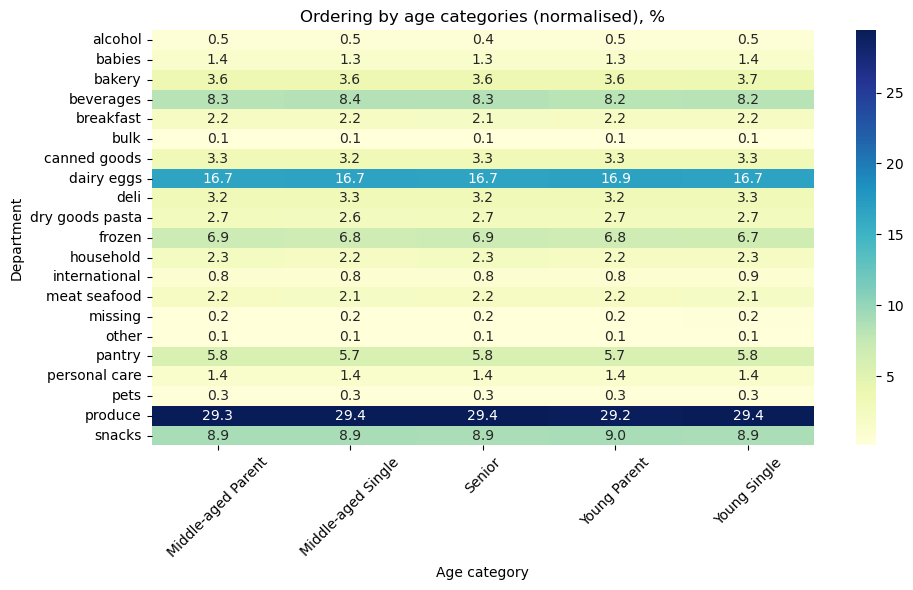

In [63]:
# multiply by 100 to express as percentages
crosstab_age_department_prop_percent = crosstab_age_department * 100

# creating heatmap 
plt.figure(figsize=(10, 6)) 
sns.heatmap(crosstab_age_department_prop_percent, cmap='YlGnBu', annot=True, fmt='.1f')

# Labels
plt.title('Ordering by age categories (normalised), %')
plt.ylabel('Department')
plt.xlabel('Age category')

plt.xticks(rotation=45)
plt.yticks(rotation=0)                                      
plt.tight_layout()
plt.show()

In [64]:
# saving figure'heatmap_orders_dep_by_age'

plt.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\heatmap_orders_dep_by_age.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

# Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

Which products are popular in specific regions?

In [80]:
# crosstab 
crosstab_region_dept = pd.crosstab(df_2['department'], df_2['region'], normalize='columns')

In [82]:
# multiply by 100 to express as percentages
crosstab_region_dept_prop_percent = crosstab_region_dept * 100

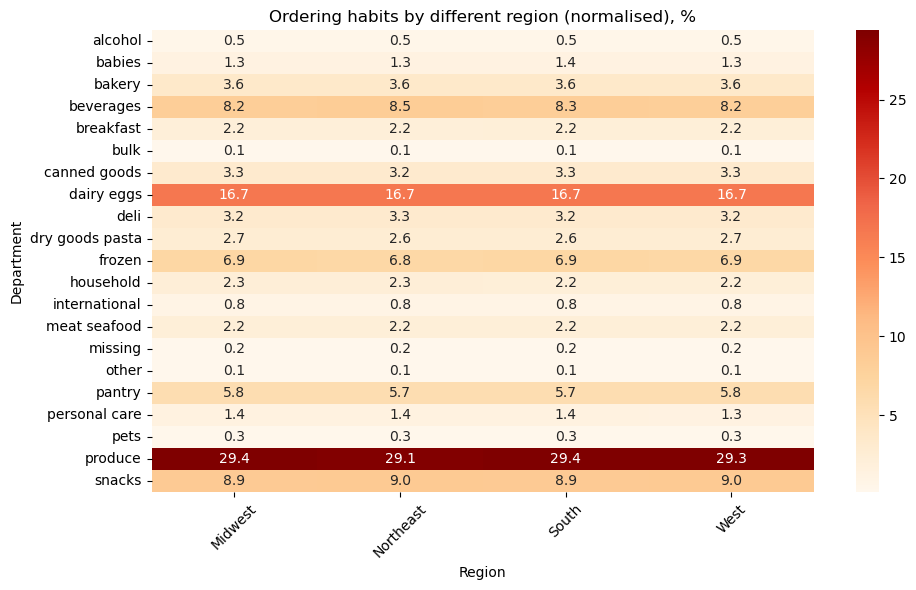

In [83]:
# Heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_region_dept_prop_percent, annot=True, fmt='.1f', cmap='OrRd')
plt.title('Ordering habits by different region (normalised), %')
plt.xlabel('Region')
plt.ylabel('Department')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()
plt.show()

In [84]:
# saving figure
plt.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\heatmap_region_orders.png',bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

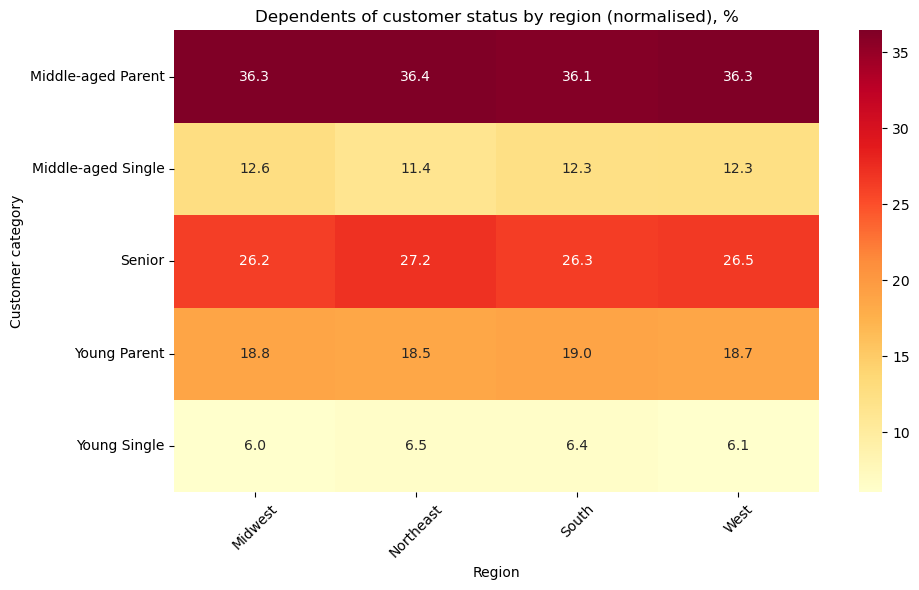

<Figure size 640x480 with 0 Axes>

In [85]:
# crosstab of region and customer status
crosstab_region_house = pd.crosstab(df_2['age_category'], df_2['region'], normalize='columns')

# multiply by 100 to express as percentages
crosstab_region_house_prop_percent = crosstab_region_house * 100

# heatmap 
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_region_house_prop_percent, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Dependents of customer status by region (normalised), %')
plt.xlabel('Region')
plt.ylabel('Customer category')

plt.xticks(rotation=45)
plt.yticks(rotation=0)            
plt.tight_layout()
plt.show()

# saving figure
plt.savefig(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\heatmap_region_custstatus.png', bbox_inches='tight')

# Exporting final dataframe used for analyses

In [88]:
df_2.to_pickle(r'D:\Work\Python-Data-Prepared Data\Exercise 4.10\final_data_set.pkl')